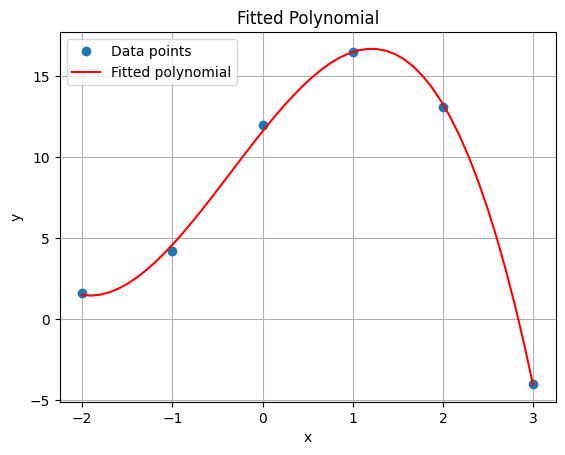

In [20]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x = np.array([-2, -1, 0, 1,2,3])
y = np.array([1.6, 4.2, 11.99, 16.5, 13.1, -4])

n = len(x)
coefficients = np.polyfit(x, y, 3)
p = np.poly1d(coefficients)

x_values = np.linspace(min(x), max(x))

y_values = p(x_values)

plt.plot(x, y, 'o', label='Data points')
plt.plot(x_values, y_values, label='Fitted polynomial', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Polynomial')
plt.legend()
plt.grid(True)
plt.show()

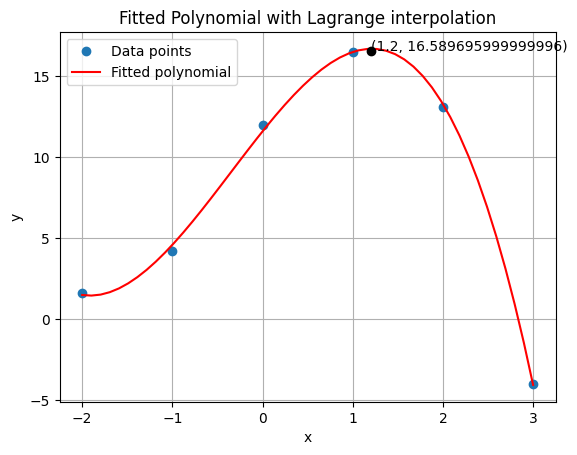

In [23]:
xp = 1.2

def evaluate(x, y, xp):
    yp = 0
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p = p * (xp - x[j]) / (x[i] - x[j])
        yp = yp + y[i] * p
    return yp

yp = evaluate(x, y, xp)
#yp = round(yp, 6)

plt.plot(x, y, 'o', label='Data points')
plt.plot(x_values, y_values, label='Fitted polynomial', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Polynomial with Lagrange interpolation')
plt.legend()
plt.grid(True)

plt.plot(xp, yp, 'ko', label='Point (xp, yp)')
plt.text(xp, yp, f'({xp}, {yp})', ha='left')

plt.show()

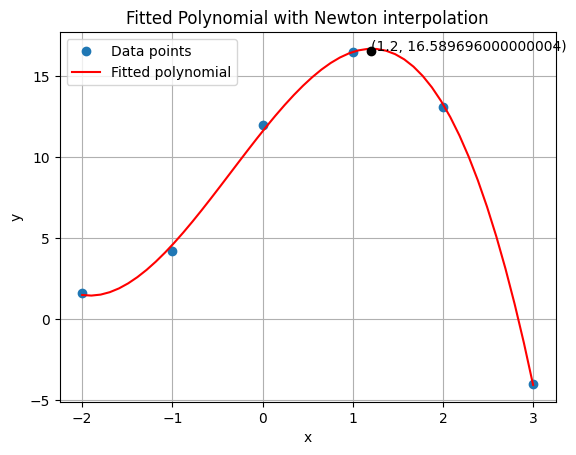

In [24]:
xp = 1.2

def newton_coefficients(x, y):
    f = np.zeros((n, n))

    # construct divided difference table
    for i in range(n):
        f[i, 0] = y[i]
    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])   
    
  
    coefficients = np.zeros(n)
    for i in range(0, n):
        coefficients[i] = f[0, i]
    return coefficients

def evaluate(x, y, xp):
    coefficients = newton_coefficients(x, y)
    n = len(coefficients)
    yp = coefficients[0]
    for i in range(1, n):
        term = coefficients[i]
        for j in range(i):
            term *= (xp - x[j])
        yp += term
    return yp

yp = evaluate(x, y, xp)
#yp = round(yp, 10)

plt.plot(x, y, 'o', label='Data points')
plt.plot(x_values, y_values, label='Fitted polynomial', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Polynomial with Newton interpolation')
plt.legend()
plt.grid(True)

plt.plot(xp, yp, 'ko', label='Point (xp, yp)')
plt.text(xp, yp, f'({xp}, {yp})', ha='left')

plt.show()

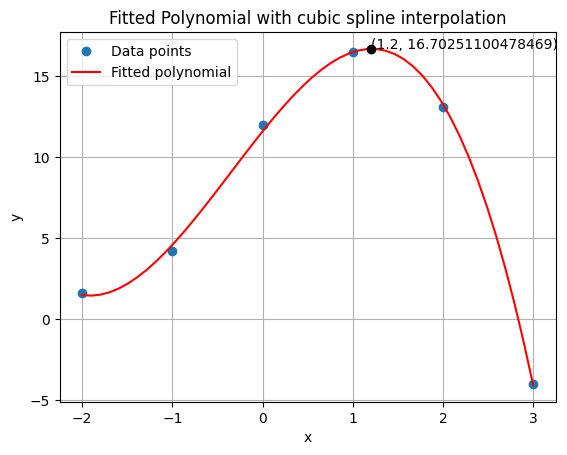